## Hyperparameter GridSearch - Base Model Titik Panas Sumatera Selatan 2001 - 2023

In [1]:
# pustaka manipulasi data array
import numpy as np

# pustaka manipulasi data frame
import pandas as pd
import random as rm
import time as tm

# pustaka untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# library normalize data with max-min algorithm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# library algorithm lstm-rnn with keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import RNN
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.optimizers import Adam, Adamax, RMSprop, SGD
from keras.layers import LeakyReLU

# pustaka untuk visualisasi acf dan pacf
import scipy.stats as sc
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# pustaka untuk  evaluasi model prediksi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
# Setting seed
rm.seed(1234)
np.random.seed(1234)
tf.random.set_seed(1234)

### 1. Akuisisi Data

In [3]:
# Set waktu komputasi
start = tm.time()

In [4]:
dataset = pd.read_csv("dataset/dataset_hotspot.csv", parse_dates=["acq_date"])

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  276 non-null    datetime64[ns]
 1   hotspot   276 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [6]:
print(dataset)

      acq_date  hotspot
0   2001-01-31        3
1   2001-02-28        5
2   2001-03-31       10
3   2001-04-30       20
4   2001-05-31       39
..         ...      ...
271 2023-08-31      186
272 2023-09-30     2247
273 2023-10-31     3200
274 2023-11-30      390
275 2023-12-31       42

[276 rows x 2 columns]


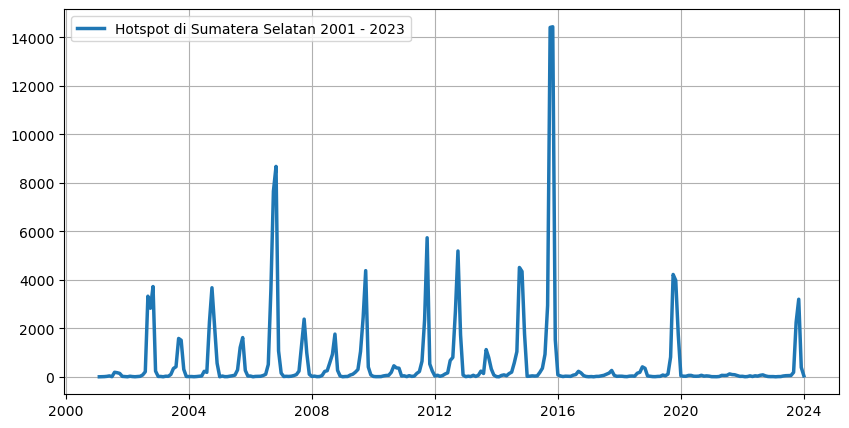

In [7]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
ax.plot(dataset["acq_date"], dataset["hotspot"], color="tab:blue", label="Hotspot di Sumatera Selatan 2001 - 2023", linewidth=2.5)

# membuat label-label
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="upper left")
ax.grid(True)

# menampilkan plot
plt.show()

### 2. PraProses Data

- seleksi fitur

In [8]:
# hanya memperhatikan aspek hotspot
data = dataset.filter(["hotspot"])
data = data.values

In [9]:
# hasil seleksi fitur
np.round(data[:5],7)

array([[ 3],
       [ 5],
       [10],
       [20],
       [39]], dtype=int64)

In [10]:
# cek dimensi normalisasi
data.shape

(276, 1)

- Normalisasi Data

In [11]:
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(np.array(data))

In [12]:
# cek dimensi normalisasi
scaled.shape

(276, 1)

- Hasil PraProses Data

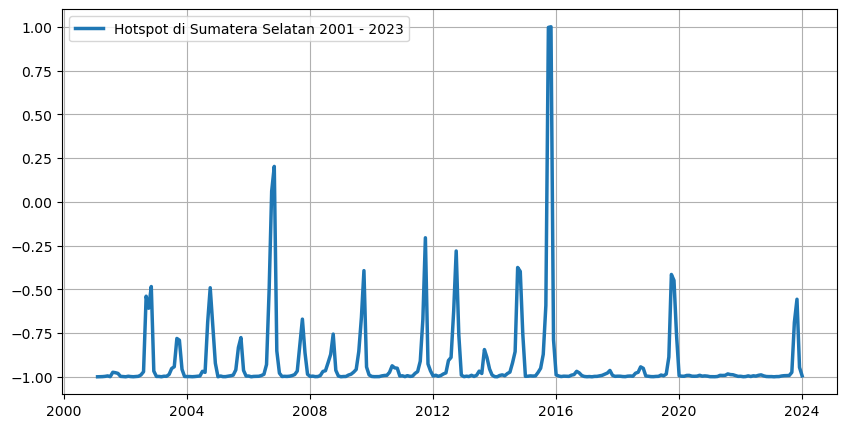

In [13]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
ax.plot(dataset["acq_date"], np.array(scaled), color="tab:blue", label="Hotspot di Sumatera Selatan 2001 - 2023", linewidth=2.5)

# membuat label-label
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="upper left")
ax.grid(True)

# menampilkan plot
plt.show()

### 3. Pembagian Data

In [14]:
# data train = tahun 2001 - 2018 = 216
# data test = tahun 2019 - 2023 = 60

In [15]:
# data train
train_size = 216

# set loc data train
train_data = scaled[0:train_size,:]

# show data train
np.round(train_data[:5],7)

array([[-1.       ],
       [-0.9997229],
       [-0.9990301],
       [-0.9976445],
       [-0.9950118]])

In [16]:
# view dimension of data train
train_data.shape

(216, 1)

In [17]:
# data test
test_size = 60

# set loc data test
test_data = scaled[train_size:len(scaled),:]

# show data test
np.round(test_data[:5],7)


array([[-0.9990301],
       [-0.9993072],
       [-0.9979216],
       [-0.9975059],
       [-0.9900236]])

In [18]:
# view dimension of data test
test_data.shape

(60, 1)

- cek hasil pembagian data

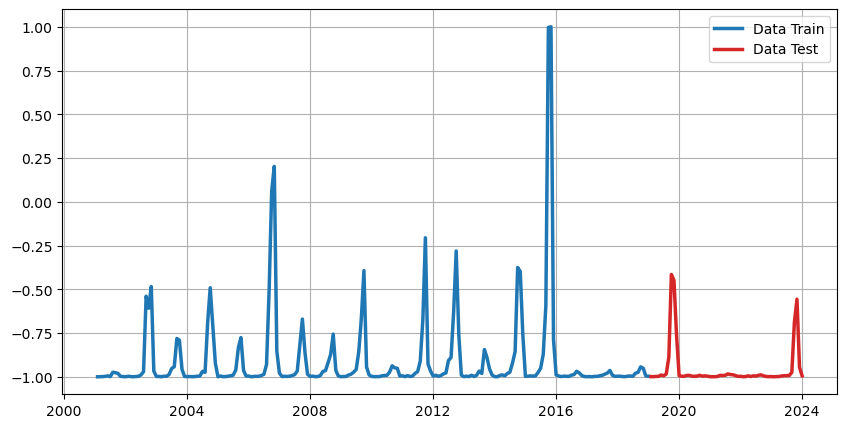

In [19]:
# make a frame
fig, ax = plt.subplots(figsize = (10,5))

# make a time series plot
ax.plot(dataset.iloc[0:len(train_data),0], train_data, color="tab:blue", label="Data Train", linewidth=2.5)
ax.plot(dataset.iloc[len(train_data):len(dataset),0], test_data, color="tab:red", label="Data Test", linewidth=2.5)

# make are labels
# ax.set_title("Hotspot Sumsel Sensor MODIS 2001-2020", fontsize=14)
# ax.set_xlabel("Years", fontsize=12)
# ax.set_ylabel("Sum of hotspot", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

# show plot time series
plt.show()

### 5. Supervised Learning

In [20]:
# function for supervised learning
def create_dataset(look_back, dataset):
    
    # declare variable X and Y
    dataX = []
    dataY = []
    
    # for loop for create supervised learning
    for i in range(look_back, len(dataset)):
        
        # insert value X and Y 
        dataX.append(dataset[i-look_back:i, 0])
        dataY.append(dataset[i, 0])
        
    # return value X and Y
    return np.array(dataX), np.array(dataY)

In [21]:
# set time series lag
look_back = 1

In [22]:
# Proses supervised learning
x_train, y_train = create_dataset(look_back, train_data)
print(x_train.shape, y_train.shape)

(215, 1) (215,)


In [23]:
# Proses supervised learning
x_test, y_test = create_dataset(look_back, test_data)
print(x_test.shape, y_test.shape)

(59, 1) (59,)


In [24]:
# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

- hasil supervised learning

In [25]:
# cek dimensi data
print(x_train.shape, x_test.shape)

(215, 1, 1) (59, 1, 1)


### 6. Hyperparameter GridSearchCV LSTM-RNN

- library for hyperparameter

In [26]:
import itertools
from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

- set models lstm-rnn with sliding windows and timestep

In [27]:
# function models
def get_model(activation='tanh', optimizer='adam', dropout_rate=0.0):
    
    # design network
    model = Sequential()
    
    # # Jika menggunakan SB-LSTM-RNN
    # model.add(Bidirectional(LSTM(10, activation=activation, return_sequences=True), input_shape=(x_train.shape[1], 1)))
    # model.add(Bidirectional(LSTM(10, activation=activation, return_sequences=True), input_shape=(x_train.shape[1], 1)))
    # model.add(Bidirectional(LSTM(10, activation=activation, return_sequences=False)))
    # model.add(Dropout(dropout_rate))

    # Jika menggunakan SB-GRU-RNN
    model.add(Bidirectional(GRU(10, activation=activation, return_sequences=True), input_shape=(x_train.shape[1], 1)))
    model.add(Bidirectional(GRU(10, activation=activation, return_sequences=True), input_shape=(x_train.shape[1], 1)))
    model.add(Bidirectional(GRU(10, activation=activation, return_sequences=False)))
    model.add(Dropout(dropout_rate))
    
    # the output layer
    model.add(Dense(1))

    # compiling model
    model.compile(
        optimizer=optimizer,
        loss="mae",
        metrics=[
            tf.keras.metrics.MeanAbsoluteError(),
            tf.keras.metrics.MeanSquaredError(),
            tf.keras.metrics.MeanAbsolutePercentageError(),
        ]
    )
    
    # return value
    return model

Set parameter
- activation function = tanh, sigmoid, relu, selu, softplus, elu.
- optimizers = adam, adamax, rmsprop, sgd.
- droupout = 0.00, 0.05, 0.1, 0.15, 0.2, 0.25
- batch size = 2, 4, 8, 16, 32, 64
- epoch = 2500

In [28]:
# # set parameter activation
# activation = ['tanh', 'sigmoid', 'relu', 'selu', 'elu', 'softplus']

# set parameter activation
activation = ['relu', 'selu']

In [29]:
# # set parameter optimizer
# optimizer = ['adam', 'adamax', 'rmsprop', 'sgd']

# set parameter optimizer
optimizer = ['sgd']

In [30]:
# # set parameter dropout_rate
# dropout_rate = [0.05, 0.1, 0.15, 0.2, 0.25]

# set parameter dropout_rate
dropout_rate = [0.15, 0.2]

In [31]:
# # set parameters batch sizes
# batch_size = [2, 4, 8, 16, 32]

# set parameters batch sizes
batch_size = [4]

In [32]:
# # set parameter epochs
# epochs = [2500]

# set parameter epochs
epochs = [1]

In [33]:
# set all parameter to dictionary
param_grid = dict(
    model__activation=activation,
    model__optimizer=optimizer,
    model__dropout_rate=dropout_rate,
    batch_size=batch_size,
    epochs=epochs
)

In [34]:
# show parameter a gridsearch
param_grid

{'model__activation': ['relu', 'selu'],
 'model__optimizer': ['sgd'],
 'model__dropout_rate': [0.15, 0.2],
 'batch_size': [4],
 'epochs': [1]}

In [35]:
keys = param_grid.keys()
values = (param_grid[key] for key in keys)
combinations = [dict(zip(keys, combination)) for combination in itertools.product(*values)]
print(len(combinations), str('kombinasi hyperparameter'))

4 kombinasi hyperparameter


In [36]:
# set grid model with KerasRegressor
grid_model = KerasRegressor(model=get_model, verbose=1)

In [37]:
# process a gridsearchCV
grid_search = GridSearchCV(estimator=grid_model, param_grid=param_grid, n_jobs=-1, cv=2, scoring='neg_root_mean_squared_error')

In [38]:
# show a result gridsearchCV
grid_result = grid_search.fit(x_train, y_train)

ValueError: 
All the 8 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lunox\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lunox\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\lunox\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 926, in _fit
    self._check_model_compatibility(y)
  File "c:\Users\lunox\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 549, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                   ^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: object of type 'NoneType' has no len()


In [ ]:
# summarize results
print("Best parameters: %f using %s\n" % (grid_search.best_score_, grid_search.best_params_))

In [ ]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
result = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["score"])],axis=1)

In [ ]:
result.sort_values(by="score", ascending=False)

In [ ]:
# result.sort_values(by="score", ascending=False).to_csv('gridsearch_percobaan1.csv',index=False)

### Evaluasi Model Prediksi

- kompleksitas waktu

In [ ]:
# Set akhir waktu komputasi 
end = tm.time()

In [ ]:
# Proses menghitung waktu komputasi
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

In [ ]:
# Hasil waktu komputasi
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))